<a href="https://colab.research.google.com/github/dalton-rutledge/Portfolio/blob/master/KMeans%2B%2BDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>K-Means Clustering</h1>

<h2>Clustering</h2>

<p>Clustering a data set $X$ into $n$ clusters $C$ involves defining a function $$f : X \rightarrow Y $$ which assigns a cluster $y_i \in Y$ to each data point $x_j \in X$. </p>

<p>It is a form of unsupervised learning. Although it can be used for classification by setting the class of each $x$ to $f(x)$, the labels $y$ are learned by the clustering algorithm, not provided. Learning $f(x)$ from both samples $X$ <b>and</b> labels $Y$ would constitute a supervised approach.</p>

<h2>K-Means</h2>

<p>The $k$ in K-means refers to the number of clusters. The algorithm learns to assign points $x$ to $k$ clusters. The "means" refers to how the clusters are decided. Each cluster has a center: the mean of all the points in the cluster. Point $x$ belongs to the cluster $y$ whose center (mean) is closest.</p> 

<p>The means are computed through an iterative process:
<ol>
    <li>Select the initial $k$ means.</li>
    <li>Assign a cluster $y$ to each $x$ in the training data according to the mean that is closest.</li>
    <li>Update the $k$ means to be the means of the new clusters.</li>
    <li>Repeat steps 2 and 3 until the means stop changing.</li>
</ol>
Further readings can be found on the <a href="http://cs.westminstercollege.edu">the class website.</a></p>

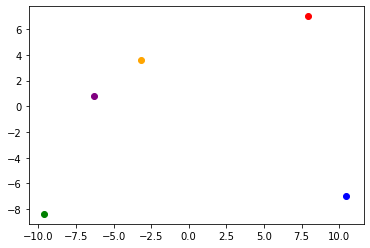

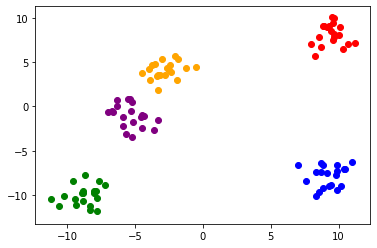

In [0]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

# 1. use make_blobs to generate data
xs,ys = make_blobs(n_samples=100, n_features=2, centers=5)


# 2. implement k-means 
#2.1 We will start with k = 5 meaning we want to find 5 centers
k = 5 

#According to k-means++ algorithm, we then choose one center randomly from existing centers.
#The next step is to calcualte D(x)**2 / sum([D(x)**2 for x in xs]) for all X.
#Note that we do not need to exlcude previously chosen centers, because their D(x)**2 = 0, meaning they have a 0 probability of getting chosen for the next center


#The below function calculates the distance squared to the closest center for each x, divides that number by the sum of the distance squared, and returns a normalized list of those values
def calculateDXsqrd(xs, means):
  DXsqrd = []
  for x in xs:
    curMin = math.inf
    for mean in means:
      #distance squared just gets rid of the square root in the formula for us
      distance = (mean[0] - x[0])**2 + (mean[1] - x[1])**2
      if distance < curMin:
        curMin = distance
    #add the square of the minimum distance to the list
    DXsqrd.append(curMin**2)
  #sum our distances then update each value by dividing by this sum
  sumOfDistances = sum(DXsqrd)
  for dx in DXsqrd:
    dx = dx / sumOfDistances
  #normalize the list so that it represents a list of probabilities
  norm = [float(i)/sum(DXsqrd) for i in DXsqrd]
  return norm


#we can then use this function, along with numpy.random.choice (with probability array specified), to build a function that picks k means according to the kmeans++ algorithm

def pickMeansPlusPlus(xs, k):
  #pick a random mean
  firstCenter = np.random.choice(xs.shape[0], size=1, replace=False)
  firstCenter = firstCenter[0]  #we just want the value, take it out of its list home, you have no idea how long it took me to debug that one issue haha
  means = [xs[firstCenter]]
  #pick k - 1 more means
  for i in range(k-1):
    probabilityList = calculateDXsqrd(xs, means)
    newMean = np.random.choice(xs.shape[0], size=1, replace=False, p=probabilityList)
    newMean = newMean[0]
    newMean = xs[newMean]
    means.append(newMean)
  
  #reformat means to a list of tuples because I like those as a datastructure for working with
  means = [(mean[0], mean[1]) for mean in means]
  return means


#the below code picks the k means from available data
kmeansPP = pickMeansPlusPlus(xs, k)
kmeansPP = [(mean[0], mean[1]) for mean in kmeansPP]
#the below code plots the 5 means as different colors
colors = ["red", "green", "blue", "purple", "orange"]
f = plt.figure()
ax = f.gca()
i = 0
for mean in kmeansPP:
  ax.scatter(mean[0], mean[1], c=colors[i])
  i = i + 1
  
#all code below was used for the original kmeans implementation
#2.2 cluster all the data according to its nearest mean

def clusterAPoint(x, means):
  closest = math.inf
  bestMean = means[0]
  for mean in means:
    dist = math.sqrt((mean[0] - x[0])**2 + (mean[1] - x[1])**2)
    if dist < closest:
      closest = dist
      bestMean = mean
  return bestMean

def cluster(xs, means):
  clusters = {}
  for mean in means:
    clusters[mean] = []
  for x in xs:
    bestMean = clusterAPoint(x, means)
    clusters[bestMean].append(x)
  return clusters
  
  
#example of how to create the initial clusters
#clusters = cluster(xs, means)  


#2.3 update the means by taking the mean of the new clusters
def reDoMeans(clusters):
  newMeans = []
  x1s = []
  x2s = []
  for key in clusters:
    for value in clusters[key]:
      x1s.append(value[0])
      x2s.append(value[1])
    newMeans.append( (statistics.mean(x1s), statistics.mean(x2s)) )
    x1s = []
    x2s = []
  return newMeans

#means = reDoMeans(clusters)   # re calculate the means example



#2.4 repeat 2.2 and 2.3 until we converge (meaning the means havent changed between iterations)
def plot(xs, means):
  oldMeans = None
  while oldMeans != means:
    clusters = cluster(xs, means)
    oldMeans = means
    means = reDoMeans(clusters)


  # 3. plot each cluster with a different color  --> I actually accomplished this by plotting by individual points
  colors = ["red", "green", "blue", "purple", "orange"]
  f = plt.figure()
  ax = f.gca()
  i = 0
  for mean in means:
    for value in clusters[mean]:
      ax.scatter(value[0], value[1], c=colors[i])
    i = i + 1
  

#the below code plots all data, colored by cluster
#call plot on some data, and some means  
plot(xs, kmeansPP)